## Observations:

1. According to the vader sentiment analysis scatter plot covering the 200 tweet testing period, @CNN sent several of most negative individual tweets. However, they sent many neutral+ tweets, which resulted in @CNN having the highest overall most positive compound sentiment score reflected on the bar chart. This suggests that any organizanization could tweet really negative things and still be perceived as an overall positive contributor on social media if they send enough tweets rated with an above 0 compound score, even if the tweets score in teh highly positive range.

2. According to the vader sentiment analysis scatter plot covering the 200 tweet testing period, @CBSNews sent no neutral- individual tweets, many positive or neutral+ individual tweets, and several negative tweets. The overall data frame indicates they had the highest positive score, but their negative tweets pulled down their compound score below @CNN's even though @CNN had no highly positive tweets.

3. When we make a casual comparison of the positive, negative, neutral, and compound score values contained in the overall scoring data frame, it becomes clear that negative scores make up the highest proportion of each news outlet's tweets. Also, the positive and neutral scores must be weighted more heavily when computing the normalizing compound score. These facts provide a full explanation for the trends identified in observations 1 and 2.

4. As an additional note, I ran the API call two times a day, on 3 seperate days and applied the analytical code each time. For each day the second pull occurred between 1 and 4 hours apart. In each case the scatter and bar charts changed drastically. This assignment called for a minimum of 100 tweets to be analyzed, but I analyzed 200 because I thought 100 was not a large enough sample. Given the widely variable analytics just on a daily basis, I suggest that a still much larger sample or an explanded study method are needed in order to make a clear comparison between each news outlet's tweet sentiment behaviors.

In [2]:
# Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import tweepy

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Please use your own twitter API keys
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""


In [4]:
# Tweepy setup
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [5]:
# Identify news twitter accounts to be analyzed
# I added @WSJ in order to give print news better representation and specified BBCNorthAmerica
# to better match regional news cycles with the other target users
target_users = ("@BBCNorthAmerica", "@CNN", "@CBSNews", "@FoxNews", "@nytimes", "@WSJ")

In [6]:
# setup sentiment variable list for later array setup
sentiment = []

In [7]:
# Setup loop of the target list
for user in target_users:
    
    # Set counter to track tweets ago
    counter = 0

    # Setup loop for review of 200 tweets over 10 pages
    for x in range(10):
    
        # Get tweets with the help of tweepy
        public_tweets = api.user_timeline(user)

        # Setup loop of individual tweets for one by one analysis
        for tweet in public_tweets:
            
            # Put each tweet through Vader analysis
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
            
            # Append sentiment variable list as array
            sentiment.append({"News Source": user, 
                              "Date": tweet["created_at"], 
                              "Compound": compound, 
                              "Positive": pos, 
                              "Negative": neu, 
                              "Neutral": neg, 
                              "Tweets Ago": counter, 
                              "Tweet Text": tweet["text"]})
            
            # Update counter
            counter = counter + 1


In [8]:
# Put all tweet sentiments data into dataframe  
news_tweet_vader = pd.DataFrame.from_dict(sentiment)
news_tweet_vader.head()

,Compound,Date,Negative,Neutral,News Source,Positive,Tweet Text,Tweets Ago
0,-0.8271,Sun Dec 17 16:55:29 +0000 2017,0.315,0.685,@BBCNorthAmerica,0.0,CIA 'helped stop Russia terror attack' https:/...,0
1,-0.2960,Sun Dec 17 15:23:05 +0000 2017,0.879,0.121,@BBCNorthAmerica,0.0,"""There's no amount of money that can compensat...",1
2,0.0000,Sun Dec 17 14:41:40 +0000 2017,1.000,0.000,@BBCNorthAmerica,0.0,Christmas across US Mexico border https://t.co...,2
3,0.0000,Sun Dec 17 13:50:04 +0000 2017,1.000,0.000,@BBCNorthAmerica,0.0,It's time to tell you about the family busines...,3
4,-0.7184,Sun Dec 17 12:19:08 +0000 2017,0.625,0.375,@BBCNorthAmerica,0.0,Barry Sherman: Family disputes reports on myst...,4


In [9]:
len(news_tweet_vader)

1200

In [20]:
# Save bulk data dataframe as a csv
news_tweet_vader.to_csv("news_source_tweet_sentiment.csv", encoding="utf-8", index=False)

In [11]:
# Split mixed data into individual news source dataframes

bbc_vader_df = news_tweet_vader.loc[news_tweet_vader["News Source"] == "@BBCNorthAmerica", :]
bbc_vader_df.head()

,Compound,Date,Negative,Neutral,News Source,Positive,Tweet Text,Tweets Ago
0,-0.8271,Sun Dec 17 16:55:29 +0000 2017,0.315,0.685,@BBCNorthAmerica,0.0,CIA 'helped stop Russia terror attack' https:/...,0
1,-0.2960,Sun Dec 17 15:23:05 +0000 2017,0.879,0.121,@BBCNorthAmerica,0.0,"""There's no amount of money that can compensat...",1
2,0.0000,Sun Dec 17 14:41:40 +0000 2017,1.000,0.000,@BBCNorthAmerica,0.0,Christmas across US Mexico border https://t.co...,2
3,0.0000,Sun Dec 17 13:50:04 +0000 2017,1.000,0.000,@BBCNorthAmerica,0.0,It's time to tell you about the family busines...,3
4,-0.7184,Sun Dec 17 12:19:08 +0000 2017,0.625,0.375,@BBCNorthAmerica,0.0,Barry Sherman: Family disputes reports on myst...,4


In [12]:
cnn_vader_df = news_tweet_vader.loc[news_tweet_vader["News Source"] == "@CNN", :]
cnn_vader_df.head()

,Compound,Date,Negative,Neutral,News Source,Positive,Tweet Text,Tweets Ago
200,0.4588,Sun Dec 17 17:45:04 +0000 2017,0.850,0.000,@CNN,0.150,Here's what's in the tax bill for homeowners:\...,0
201,0.0164,Sun Dec 17 17:30:31 +0000 2017,0.685,0.156,@CNN,0.159,Their missions vary greatly: To provide loving...,1
202,0.2500,Sun Dec 17 17:22:18 +0000 2017,0.895,0.000,@CNN,0.105,"""Do I need a British accent?"" former President...",2
203,0.4019,Sun Dec 17 17:00:47 +0000 2017,0.881,0.000,@CNN,0.119,Alabama Senator-elect Doug Jones says it's tim...,3
204,0.2584,Sun Dec 17 16:45:10 +0000 2017,0.855,0.000,@CNN,0.145,UK Prime Minister Theresa May 'will not be der...,4


In [13]:
cbs_vader_df = news_tweet_vader.loc[news_tweet_vader["News Source"] == "@CBSNews", :]
cbs_vader_df.head()

,Compound,Date,Negative,Neutral,News Source,Positive,Tweet Text,Tweets Ago
400,0.2732,Sun Dec 17 17:34:28 +0000 2017,0.909,0.000,@CBSNews,0.091,"Sen. John McCain is ""doing well"" and is ""looki...",0
401,0.4019,Sun Dec 17 17:20:01 +0000 2017,0.863,0.000,@CBSNews,0.137,Sen. Bernie Sanders joined @FaceTheNation to d...,1
402,0.0000,Sun Dec 17 17:04:41 +0000 2017,1.000,0.000,@CBSNews,0.000,White House @PressSec Sarah Huckabee Sanders c...,2
403,0.0000,Sun Dec 17 17:00:02 +0000 2017,1.000,0.000,@CBSNews,0.000,"Michael McDonald is back with ""Wide Open"" and ...",3
404,-0.3182,Sun Dec 17 16:40:01 +0000 2017,0.776,0.142,@CBSNews,0.082,"Treasury Sec. Mnuchin says lobbyists ""absolute...",4


In [14]:
fox_vader_df = news_tweet_vader.loc[news_tweet_vader["News Source"] == "@FoxNews", :]
fox_vader_df.head()

,Compound,Date,Negative,Neutral,News Source,Positive,Tweet Text,Tweets Ago
600,-0.6597,Sun Dec 17 17:41:19 +0000 2017,0.694,0.306,@FoxNews,0.000,'Batman' Actor Christian Bale: Trump's America...,0
601,0.0000,Sun Dec 17 17:28:40 +0000 2017,1.000,0.000,@FoxNews,0.000,'Take Them Out In Cuffs': Pirro Doubles Down o...,1
602,0.0000,Sun Dec 17 17:26:01 +0000 2017,1.000,0.000,@FoxNews,0.000,".@AmbJohnBolton: ""I think the fact that Secret...",2
603,0.0000,Sun Dec 17 17:22:14 +0000 2017,1.000,0.000,@FoxNews,0.000,"Trump, Putin Spoke Today via Phone https://t.c...",3
604,0.3612,Sun Dec 17 17:15:00 +0000 2017,0.872,0.000,@FoxNews,0.128,"Jones supports DACA, says it’s time for GOP op...",4


In [15]:
nyt_vader_df = news_tweet_vader.loc[news_tweet_vader["News Source"] == "@nytimes", :]
nyt_vader_df.head()

,Compound,Date,Negative,Neutral,News Source,Positive,Tweet Text,Tweets Ago
800,0.1280,Sun Dec 17 17:45:05 +0000 2017,0.741,0.116,@nytimes,0.143,President Trump's lawyer accused the special c...,0
801,-0.0258,Sun Dec 17 17:30:06 +0000 2017,0.558,0.200,@nytimes,0.242,"“If we treat the dead like garbage, then the l...",1
802,0.0000,Sun Dec 17 17:20:41 +0000 2017,1.000,0.000,@nytimes,0.000,RT @nytimesworld: Chile’s presidential electio...,2
803,0.7609,Sun Dec 17 17:11:43 +0000 2017,0.600,0.102,@nytimes,0.298,"For women, the burden of caring for children c...",3
804,-0.8779,Sun Dec 17 17:10:05 +0000 2017,0.641,0.359,@nytimes,0.000,"When this baby died, severe malnutrition was l...",4


In [16]:
wsj_vader_df = news_tweet_vader.loc[news_tweet_vader["News Source"] == "@WSJ", :]
wsj_vader_df.head()

,Compound,Date,Negative,Neutral,News Source,Positive,Tweet Text,Tweets Ago
1000,0.0000,Sun Dec 17 17:40:02 +0000 2017,1.000,0.000,@WSJ,0.000,A small club in suburban Chicago bought a ski ...,0
1001,-0.2960,Sun Dec 17 17:22:31 +0000 2017,0.891,0.109,@WSJ,0.000,No federal law requires home sellers to disclo...,1
1002,0.0000,Sun Dec 17 17:00:02 +0000 2017,1.000,0.000,@WSJ,0.000,Dianne Feinstein says she sees another ‘year o...,2
1003,0.0000,Sun Dec 17 16:45:09 +0000 2017,1.000,0.000,@WSJ,0.000,Taxes look to be just one of many factors in A...,3
1004,-0.3182,Sun Dec 17 16:30:07 +0000 2017,0.670,0.196,@WSJ,0.134,Banks offer to spice up some deals with levera...,4


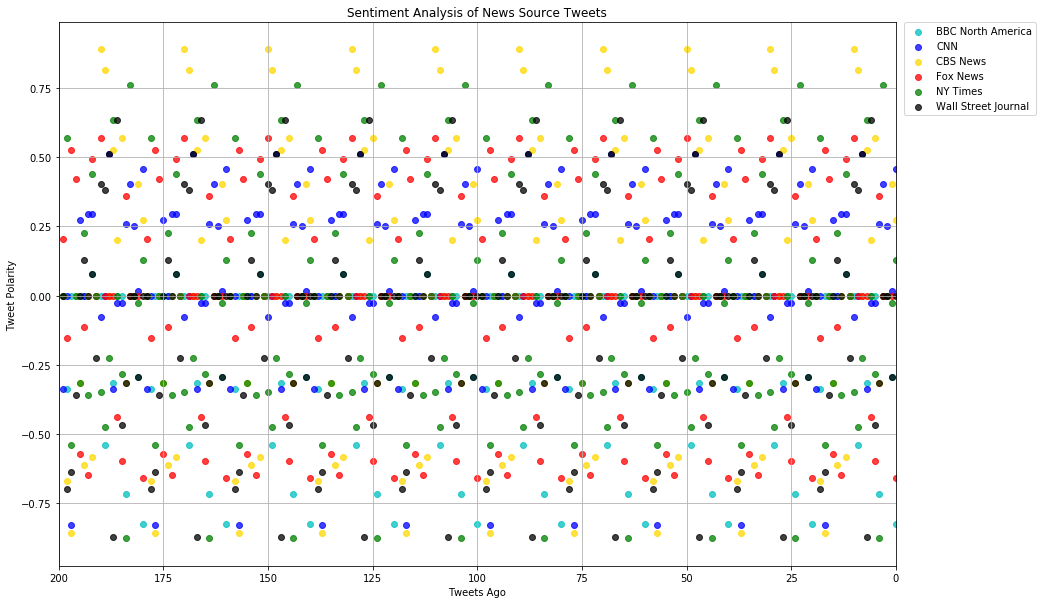

In [21]:
# plot the polarity of news source tweets

fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(bbc_vader_df["Tweets Ago"], bbc_vader_df["Compound"], 
           color = "c", alpha=0.75, label="BBC North America") 

ax.scatter(cnn_vader_df["Tweets Ago"], cnn_vader_df["Compound"], 
           color = "b", alpha=0.75, label="CNN")

ax.scatter(cbs_vader_df["Tweets Ago"], cbs_vader_df["Compound"], 
           color = "gold", alpha=0.75, label="CBS News")

ax.scatter(fox_vader_df["Tweets Ago"], fox_vader_df["Compound"], 
           color = "r", alpha=0.75, label="Fox News")

ax.scatter(nyt_vader_df["Tweets Ago"], nyt_vader_df["Compound"], 
           color = "g", alpha=0.75, label="NY Times")

ax.scatter(wsj_vader_df["Tweets Ago"], wsj_vader_df["Compound"], 
           color = "k", alpha=0.75, label="Wall Street Journal")

plt.grid()
plt.xlim(200, 0)

plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

plt.title("Sentiment Analysis of News Source Tweets")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

plt.savefig("news_individual_tweet_sentiment.png")
plt.show()

In [22]:
# Create dataframe of mean sentiment data for each news source to be graphed
news_tweet_means = news_tweet_vader.groupby("News Source").mean()

# Remove problematic symbol from news source names
#news_tweet_means["News Source"] = ["BBCNorthAmerica", "CBSNews", "CNN", "FoxNews", "NYTimes", "WSJ"]
news_tweet_overall = news_tweet_means.reset_index()
news_tweet_overall

,News Source,Compound,Negative,Neutral,Positive,Tweets Ago
0,@BBCNorthAmerica,-0.148150,0.88405,0.10320,0.01280,99.5
1,@CBSNews,0.016045,0.82525,0.08985,0.08490,99.5
2,@CNN,0.055955,0.86330,0.05795,0.07870,99.5
3,@FoxNews,-0.030330,0.85820,0.07885,0.06295,99.5
4,@WSJ,-0.087390,0.83530,0.09765,0.06705,99.5
5,@nytimes,-0.034960,0.83350,0.09655,0.06995,99.5


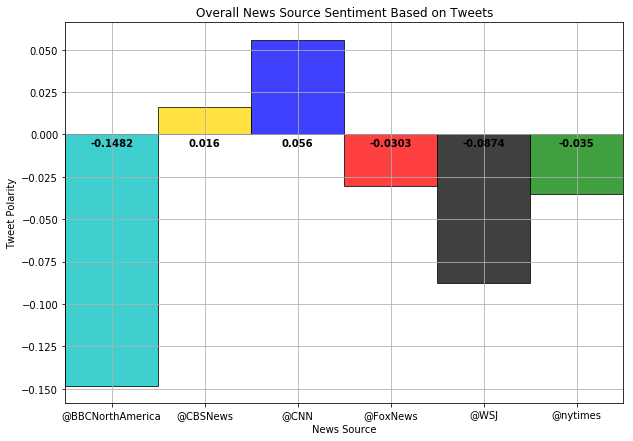

In [23]:
# plot bar chart of overall sentiment for each news source

c = ["c", "gold", "b", "r", "k", "g"]
ec= ["k", "k", "k", "k", "k", "k"]
fig, ax = plt.subplots(figsize=(10, 7))

ax.bar(news_tweet_overall["News Source"], news_tweet_overall["Compound"], color=c, width=1, 
       edgecolor=ec, alpha=.75)

for i, j in enumerate(news_tweet_overall["Compound"]):
    ax.annotate((str(np.round(j, decimals=4))), xy=(i,-.007), ha="center", 
                color="k", fontweight="bold")

# set title and axis labels
plt.title("Overall News Source Sentiment Based on Tweets")
plt.xlabel("News Source")
plt.ylabel("Tweet Polarity")
plt.xlim(-0.5, len(news_tweet_overall)-0.5)
plt.grid()

plt.savefig("overall_news_sentiment.png")
plt.show()